# Assignments 2 Continue Random Walk Simulation 

## Learning Objectives
* Implement concepts in random walk simulation
* Apply a stochastic process to design and create simulations 
* Create, implement, and analyze simulations
* Visualize simulation results using Python

# Introduction

In this assignment, you will revise and extend the drunk simulation we covered in the lecture note on random walking simulation.  You will write class definitions as well as revising and expanding the drunk simulation given in the lecture notes. The below cells contain code covered in our lecture. More specifically, to approach the problems in this assignment, you need to use the class definitions such as ```Location```, ```Field```, ```OddField```, ```Location```, ```Drunk```, ```UsualDrunk``` and ```MasochistDrunk``` and some other useful class and function definitions from the lecture notes.  

You are recommend to run the code cells below before approaching the problems in this assignment.  You should NOT change any of the below code when approaching the assignment.   


In [5]:
import random

class Location(object):
    def __init__(self, x, y):
        """x and y are numbers"""
        self.x = x
        self.y = y

    def move(self, deltaX, deltaY):
        """deltaX and deltaY are numbers"""
        return Location(self.x + deltaX, self.y + deltaY)

    def getX(self):
        return self.x

    def getY(self):
        return self.y

    def distFrom(self, other):
        xDist = self.x - other.getX()
        yDist = self.y - other.getY()
        return (xDist**2 + yDist**2)**0.5
    
    def __eq__(self, other):
        if isinstance(other, self.__class__):
            return self.x == other.x and self.y == other.y
        return False

    def __str__(self):
        return '<' + str(self.x) + ', ' + str(self.y) + '>'


class Field(object):
    def __init__(self):
        self.drunks = {}
        
    def addDrunk(self, drunk, loc):
        if drunk in self.drunks:
            raise ValueError('Duplicate drunk')
        else:
            self.drunks[drunk] = loc
            
    def moveDrunk(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
        xDist, yDist = drunk.takeStep()
        #use move method of Location to get new location
        self.drunks[drunk] =\
            self.drunks[drunk].move(xDist, yDist)
        
    def getLoc(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
        return self.drunks[drunk]

class OddField(Field):
    def __init__(self, numHoles = 1000,
                 xRange = 100, yRange = 100):
        Field.__init__(self)
        self.wormholes = {}
        for w in range(numHoles):
            x = random.randint(-xRange, xRange)
            y = random.randint(-yRange, yRange)
            newX = random.randint(-xRange, xRange)
            newY = random.randint(-yRange, yRange)
            newLoc = Location(newX, newY)
            self.wormholes[(x, y)] = newLoc

    def moveDrunk(self, drunk):
        Field.moveDrunk(self, drunk)
        x = self.drunks[drunk].getX()
        y = self.drunks[drunk].getY()
        if (x, y) in self.wormholes:
            self.drunks[drunk] = self.wormholes[(x, y)]

class Drunk(object):
    def __init__(self, name = None):
        """Assumes name is a str"""
        self.name = name

    def __str__(self):
        if self != None:
            return self.name
        return 'Anonymous'
    
#The usual drunk who wanders around at random 
class UsualDrunk(Drunk):
    def takeStep(self):
        stepChoices = [(0,1), (0,-1), (1, 0), (-1, 0)]
        return random.choice(stepChoices)
    
#The masochistdrunk who tries to move northward
class MasochistDrunk(Drunk):
    def takeStep(self):
        stepChoices = [(0.0,1.1), (0.0,-0.9),
                       (1.0, 0.0), (-1.0, 0.0)]
        return random.choice(stepChoices)

#this class is used in lecture and you may reference lecture code to apply it
#you of course don't need to use it
class styleIterator(object):
    """
    A styleIterator is able to circulate the use of a list of styles when plotting.
    """
    def __init__(self, styles):
        self.index = 0
        self.styles = styles

    def nextStyle(self):
        result = self.styles[self.index]
        if self.index == len(self.styles) - 1:
            self.index = 0
        else:
            self.index += 1
        return result
    
def collectPlotXY(locations):
    """
    locations: a list of Location objects.
    Returns a tuple of two lists, each one maintaining a sequence of x or y values
    """
    xVals, yVals = [], []
    for loc in locations:
        xVals.append(loc.getX())
        yVals.append(loc.getY())
    return xVals, yVals

# Problem 1 Create a SouthDrunk

The first task is to define a ```SouthDrunk``` class that is defined based on the ```Drunk``` class defined in the lecture notes.  From the class, you can create ```SouthDrunk``` objects.  Each SouthDrunk has a bias to walk southward with probability ```p```, which has the default value 0.15. (The overall probability for a SouthDrunk to go southward is ``p + (1-p)*0.25`` based on the implementation of takeStep in SouthDrunk.)

In the skeleton code provided below, the class contains the methods you need to define in the class. If the comment for the method says "do not change," please do **NOT** change it. 

Note that you are expected to define SouthDrunk as a subclass of the Drunk class. 

In [7]:
#The Southdrunk who tries to move southward
class SouthDrunk(Drunk):
    """
    A SouthDrunk is a drunk that will not randomly walk and instead
    walk southward with probability p.
    """

    p = 0.15

    @staticmethod
    def set_south_probability(prob):
        """
        Sets the probability of walking southward equal to prob.

        prob: a float (0 <= prob <= 1)
        """
        SouthDrunk.p = prob
    
    def gets_southward(self):
        """
        Answers the question: Does this SouthDrunk walk southward at this timestep?
        A Southdrunk gets faulty with probability p.

        returns: True if this SouthDrunk walks southward, False otherwise.
        """
        #do not change the given code
        return random.random() < SouthDrunk.p
    
    def takeStep(self):
        if self.gets_southward():
            return (0.0, -1.0)  # If this SouthDrunk walks southward at this step, it returns (0.0, -1.0)
        else:
            # Otherwise, it randomly steps one step east, west, north, or south.
            stepChoices = [(0.0,1.0), (0.0,-1.0), (1.0, 0.0), (-1.0, 0.0)]
            return random.choice(stepChoices)
        pass
    
#the test code is not complete.  You should add more below    
homer = SouthDrunk('Homer Simpson')
homer.takeStep()

# To test this, we input southward probability to 0.25
SouthDrunk.set_south_probability(0.25)

# Simulate a few steps and print the direction
print(f"Drunk: {homer}")
for i in range(10):  # Test for 10 steps
    step = homer.takeStep()
    print(f"Step {i+1}: {step}")



Drunk: Homer Simpson
Step 1: (0.0, -1.0)
Step 2: (-1.0, 0.0)
Step 3: (1.0, 0.0)
Step 4: (1.0, 0.0)
Step 5: (0.0, -1.0)
Step 6: (1.0, 0.0)
Step 7: (0.0, -1.0)
Step 8: (0.0, -1.0)
Step 9: (0.0, -1.0)
Step 10: (0.0, 1.0)


# Problem 2 Create a Dirty Field 

In the lecture notes, there are two class definitions including ```Field``` and ```OddField``` where drunks can walk. (The definitions of ```Field``` and ```OddField``` are presented in earlier code cells in this document.) For this problem, you need to define a ```DirtyField```. 

In the ```__init__``` method, the ```xRange``` and ```yRange``` values are used to specify the boundaries of the dirty tiles in the field. Each dirty tile should be represented as a Locatioin object.  To create a dirty tile, you should use the below code:
```Python
            x = random.randint(-xRange, xRange)
            y = random.randint(-yRange, yRange)
            aDirtyTile = Location(x, y)
``` 
This means each dirty tile is a Location object within the boundary in the ```DirtyField``` object.  

Additionally, the ```dirtyTiles``` is used to denote the number of dirty tiles in the fields. The dirty title Location objects should be different from each other in the same DirtyField. This means each dirty tile should be located differently from the other dirty tiles in the 2D space. 

Note that drunks don't like dirty tiles. When a drunk moves in the field and happens to touch a dirty tile, the drunk cannot stop the move and would keep moving till he or she is able to step on a clean tile. The sequence of the actions occurred during the move would be counted as a single move action in the dirty field at one time step. 

Below provides some skeleton code for you to extend the two methods defined in ```DirtyField```.

In [9]:
import random

class DirtyField(Field):
    def __init__(self, dirtyTiles=1000, xRange=100, yRange=100):

        """ The revision of the initialization is as below... """        
        Field.__init__(self)  # Initialize the base Field class
        self.dirtyTiles = []
        
        # Create the dirty tiles, ensuring each tile is unique
        while len(self.dirtyTiles) < dirtyTiles:
            x = random.randint(-xRange, xRange)
            y = random.randint(-yRange, yRange)
            aDirtyTile = Location(x, y)
            if aDirtyTile not in self.dirtyTiles:  # Ensure tiles are unique
                self.dirtyTiles.append(aDirtyTile)

    def moveDrunk(self, drunk):
        dirty = False #default value is false
        
        # Move the drunk once
        Field.moveDrunk(self, drunk)

        # Keep moving the drunk if it lands on a dirty tile
        while self.drunks[drunk] in self.dirtyTiles:
            dirty = True  # The drunk landed on a dirty tile
            Field.moveDrunk(self, drunk)  # Move again

        return dirty

        # Testing the DirtyField

        # Create a field with dirty tiles
        start = Location(0, 0)
        f = DirtyField()

        # Create a SouthDrunk instance
        homer = SouthDrunk('Homer')
        f.addDrunk(homer, start)

        # Move the drunk in the dirty field
        touched_dirty_tile = f.moveDrunk(homer)

        # Print whether the drunk touched a dirty tile and their current location
        print(f"Drunk touched dirty tile: {touched_dirty_tile}")
        print(f"Drunk's new location: {f.getLoc(homer)}")


# Problem 3 Create a Walk Simulation

In this problem, you will define a function for a ```SouthDrunk``` to run a number of steps in a ```DirtyField```. In this simulation, you need to create a plot that shows all the places using **blue** color the drunk visited during the walk in the ```DirtyField```. In addition to the visited locations, you also need to mark the dirty tiles **red** in the dirty field.  You should start the walk at location ```(0,0)```.  You may reference the below picture when implementing your plot. 


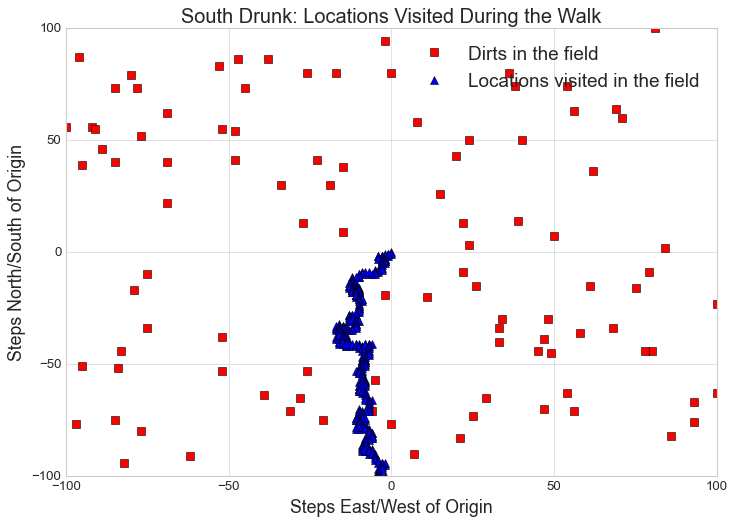

In [13]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('classic')
plt.style.use('seaborn-v0_8-whitegrid')


# Helper function to plot dirty tiles and visited locations
def plotDrunkLocsInDirtyField(locations, f):

    plt.figure(figsize=(10.5, 7))

    # Initialize a style iterator with a tuple of line styles and markers
    styleChoice = styleIterator(('rs', 'b^', 'mo','k+'))
    
    # Plot dirty tiles
    xVals, yVals = collectPlotXY(f.dirtyTiles)
    curStyle = styleChoice.nextStyle()
    plt.plot(xVals, yVals, curStyle, label='Dirts in the field', markersize=7)
    
    # Plot visited locations
    xVals, yVals = collectPlotXY(locations)
    curStyle = styleChoice.nextStyle()
    plt.plot(xVals, yVals, curStyle, label='Locations visited in the field', markersize=7)
    
    plt.legend(fontsize=17)
    plt.ylim(-100, 100)
    plt.xlim(-100, 100)
    plt.xlabel('Steps East/West of Origin', size=16)
    plt.ylabel('Steps North/South of Origin', size=16)
    plt.title("Drunk's Walk in Dirty Field", size=18)


# Function to run the simulation
def runSimulation1(dDrunk, dirtyTiles, xRange, yRange, numSteps):
    
    # Implement a DirtyField class with the given number of dirty tiles
    field = DirtyField(dirtyTiles, xRange, yRange)
    
    # Instantiate the SouthDrunk
    drunk = dDrunk('South Drunk')
    startLoc = Location(0, 0)  # Start at (0, 0)
    field.addDrunk(drunk, startLoc)
    
    # List to track the locations visited
    locations = [startLoc]
    
    # Move the drunk step by step and record locations
    for _ in range(numSteps):
        field.moveDrunk(drunk)
        locations.append(field.getLoc(drunk))
    
    # Plot the results
    plotDrunkLocsInDirtyField(locations, field)
    plt.title("South Drunk: Locations Visited During the Walk", fontsize=18)
    plt.show()

# Test your function runSimulation1    
random.seed(0)  # Set seed for reproducibility
runSimulation1(SouthDrunk, 100, 100, 100, 500)


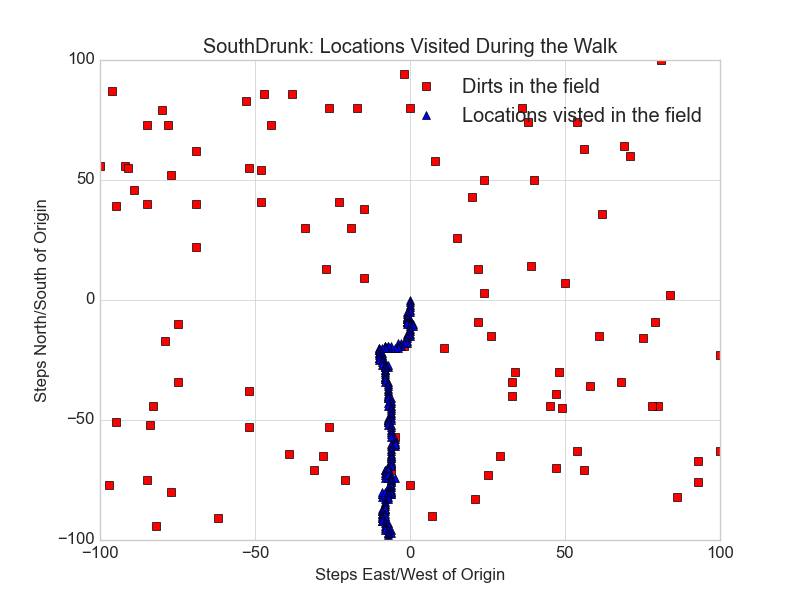

In [10]:
# Run this code cell and check the reference plotted picture

from IPython.core.display import Image 
Image(filename="p3.png")

# Problem 4 Create a Multiple-Walk Simulation

In this problem, you will define a function ```runSimulation2``` that runs ```numTrials``` trials of the multiple-walk simulation by a drunk in ```a DirtyField```.  For each walk simulation, your simulation should print the mean number of distances between the final locations and the start location as well as the maximum and minimum distances between the final locations and the start location across the multiple trials. 

You should start each walk at location ```(0,0)```.  When you define the function ```runSimulation2```, you may need to define several helper functions first and use them to modularize your function definition of ```runSimulation2```.  Please feel free to reuse the code provided in the lecture notebook. If you run the test code following ```runSimlation2``` definition, your output should be similar to the below:

<code>
SouthDrunk random walk of 10 steps
 Mean = 5.614
 Max = 10.0 Min = 1.4
SouthDrunk random walk of 100 steps
 Mean = 50.852
 Max = 66.1 Min = 28.3
SouthDrunk random walk of 1000 steps
 Mean = 495.89
 Max = 555.1 Min = 441.1
SouthDrunk random walk of 10 steps
 Mean = 5.226
 Max = 9.1 Min = 0.0
SouthDrunk random walk of 100 steps
 Mean = 48.939
 Max = 70.2 Min = 29.0
SouthDrunk random walk of 1000 steps
 Mean = 502.793
 Max = 580.1 Min = 448.5
SouthDrunk random walk of 10 steps
 Mean = 5.34
 Max = 10.0 Min = 1.4
SouthDrunk random walk of 100 steps
 Mean = 50.351
 Max = 69.2 Min = 33.1
SouthDrunk random walk of 1000 steps
 Mean = 499.571
 Max = 551.1 Min = 451.0
</code>


In [15]:
#Simulating a single walk.
def walk(f, d, numSteps):
    start = f.getLoc(d)
    for s in range(numSteps):
        f.moveDrunk(d)
    return start.distFrom(f.getLoc(d))

#Simulating multiple walks
def simWalksInDirtyField(numSteps, numTrials, dClass, dirtyTiles, xRange, yRange):
    """Assumes numSteps an int >= 0, numTrials an int > 0,
         dClass a subclass of Drunk
       Simulates numTrials walks of numSteps steps each.
       Returns a list of the final distances for each trial"""
    distances = []
    origin = Location(0, 0)
    
    for _ in range(numTrials):
        # Create a new DirtyField for each trial
        f = DirtyField(dirtyTiles, xRange, yRange)
        # Create a drunk
        drunk = dClass('Homer')
        # Add drunk to the field at the origin
        f.addDrunk(drunk, origin)
        # Simulate the walk and get the final distance
        final_dist = walk(f, drunk, numSteps)
        distances.append(final_dist)
    
    return distances

def runSimulation2(dDrunk, dirtyTiles, xRange, yRange, numTrials, walkLengths):

    # Runs num_trials trials of the multiple-walk simulation by a drunk in DirtyField. Each walk starts at location (0,0) as reisntated
    for numSteps in walkLengths:
        # Simulate walks
        distances = simWalksInDirtyField(numSteps, numTrials, dDrunk, dirtyTiles, xRange, yRange)
        
        # Calculate statistics
        mean_distance = sum(distances) / len(distances)
        max_distance = max(distances)
        min_distance = min(distances)
        
        # Print results
        print(f'{dDrunk.__name__} random walk of {numSteps} steps')
        print(f' Mean = {mean_distance:.3f}')
        print(f' Max = {max_distance:.1f} Min = {min_distance:.1f}')
        print('')  # Blank line for separation between results
    
random.seed(0)
runSimulation2(SouthDrunk, 1000, 100, 300, 100, (10, 100, 1000))
runSimulation2(SouthDrunk, 2000, 100, 300, 100, (10, 100, 1000))
runSimulation2(SouthDrunk, 3000, 100, 300, 100, (10, 100, 1000))

SouthDrunk random walk of 10 steps
 Mean = 3.838
 Max = 8.1 Min = 0.0

SouthDrunk random walk of 100 steps
 Mean = 25.758
 Max = 48.8 Min = 9.5

SouthDrunk random walk of 1000 steps
 Mean = 255.100
 Max = 313.1 Min = 197.6

SouthDrunk random walk of 10 steps
 Mean = 3.298
 Max = 8.0 Min = 0.0

SouthDrunk random walk of 100 steps
 Mean = 25.221
 Max = 42.0 Min = 10.8

SouthDrunk random walk of 1000 steps
 Mean = 252.067
 Max = 315.1 Min = 200.1

SouthDrunk random walk of 10 steps
 Mean = 3.268
 Max = 8.1 Min = 0.0

SouthDrunk random walk of 100 steps
 Mean = 26.323
 Max = 43.3 Min = 8.5

SouthDrunk random walk of 1000 steps
 Mean = 258.195
 Max = 318.0 Min = 204.4



# Problem 5 Create a Final-Location Simulation

In this problem, you will define a function ```runSimulation3``` that runs numTrials trials of a single-walk simulation by some drunk from any of the ```DrunkKinds``` in a ```DirtyField```. The length of the single-walk simulation must have numSteps. The dirty field must have ```dirtyTiles``` number of dirty tiles which are located randomly within ```fXLimit``` and ```fYLimit``` as the limits of the xy axes.  

For each trial, you should create a new DirtyField and start the drunk at location ```(0,0)```. The simulation should plot the distribution of all of the final locations for the single-walk simulations across the multiple simulation trials.  The plot should also display the the mean numbers of ```(x,y)``` distances between the final locations and the start location ```(0,0)``` across the multiple trials of the single-walks. Your plotted picture should be similar to the picture provided below. 

Hint: You should reference the lecture code that addresses similar task.  Note that you should identify which part of the lecture code that addresses a similar problem to this one.  Then, you need to make some revision so that the code is able to resolve this problem.   Feel free to ask if you have any questions or problems. 



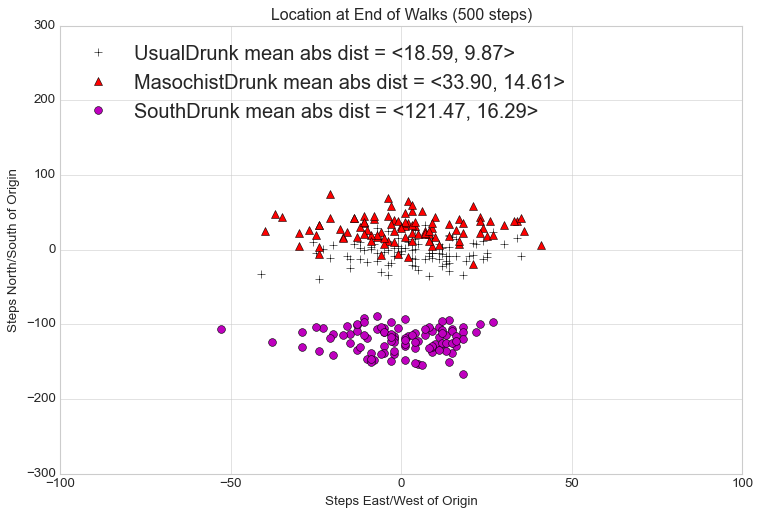

In [29]:
import matplotlib.pyplot as plt
import random
import numpy as np

# Helper function to collect x and y coordinates
def collectFinalXY(locations):
    xVals = [loc.getX() for loc in locations]
    yVals = [loc.getY() for loc in locations]
    return xVals, yVals

# Function to calculate the mean distance
def meanAbsDist(locations):
    dists = [np.sqrt(loc.getX()**2 + loc.getY()**2) for loc in locations]
    return np.mean(dists), np.std(dists)

# Plotting function
def runSimulation3(drunkKinds, dirtyTiles, fXLimit, fYLimit, numSteps, numTrials):
    styles = ['k+', 'r^', 'mo']
    mean_dists = []

    plt.figure(figsize=(11, 7))

    for i, drunkClass in enumerate(drunkKinds):
        final_locations = []
        for trial in range(numTrials):
            # Create a new DirtyField and add a drunk
            field = DirtyField(dirtyTiles, fXLimit, fYLimit)
            drunk = drunkClass(f"{drunkClass.__name__}")
            start_loc = Location(0, 0)
            field.addDrunk(drunk, start_loc)

            # Move the drunk
            for _ in range(numSteps):
                field.moveDrunk(drunk)

            # Store the final location
            final_locations.append(field.getLoc(drunk))

        # Get x and y coordinates for the plot
        xVals, yVals = collectFinalXY(final_locations)
        
        # Calculate and store the mean absolute distance
        mean_dist, std_dist = meanAbsDist(final_locations)
        mean_dists.append((mean_dist, std_dist))

        # Plot the data and add mean distance to the label
        plt.plot(xVals, yVals, styles[i], 
                 label=f'{drunkClass.__name__} mean abs dist = <{mean_dist:.2f}, {std_dist:.2f}>', 
                 markersize=7)

    # Set plot limits, labels, title, and legend
    plt.xlim(-fXLimit, fXLimit)
    plt.ylim(-fYLimit, fYLimit)
    plt.xlabel('Steps East/West of Origin')
    plt.ylabel('Steps North/South of Origin')
    plt.title(f'Location at End of Walks ({numSteps} steps)')

    plt.legend(loc='upper left', fontsize=18)
    plt.show()

# Test the simulation with different drunks
random.seed(0)
runSimulation3([UsualDrunk, MasochistDrunk, SouthDrunk], 100, 100, 300, 500, 100)


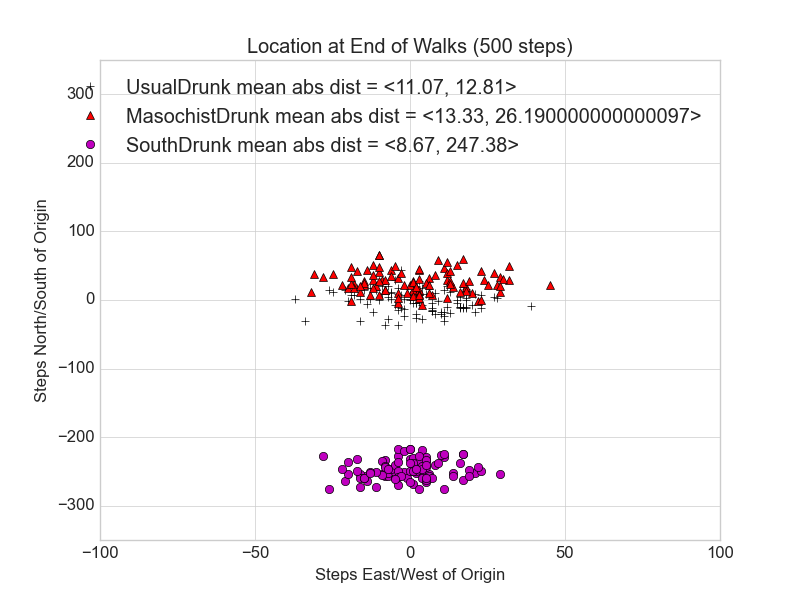

In [15]:
# Run this code cell and check the reference plotted picture

from IPython.core.display import Image 
Image(filename='p5.png')

# Turn-in
You need to turn in at least one file for your submission:

* Your notebook file that contains the code and presentation

* Any other supplementary documents you want to submit to D2L Assignments folder 

You need to package the files into a zip archive and upload the zip file to D2L assignment folder <b>Assignment 2</b>

